# Lens modeling of DESIJ2318-1106 with `lenstronomy`
**Author(s):** Muhammad Jobair Hasan, Rahul Dev Sharma, Anowar Shajib


## Install and import the required packages:

In [ ]:
# import the necessary python libraries:
import h5py
import joblib

# make sure lenstronomy is installed, otherwise install the latest pip version:
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Util import mask_util, util
from lenstronomy.Workflow.fitting_sequence import FittingSequence

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [ ]:
%matplotlib inline

## Read the data file:

In [ ]:
with h5py.File("/kaggle/input/desij2318-1106/DESIJ2318-1106_F140W.h5", "r") as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]

kwargs_data

{'background_rms': 0.017318550080132666,
 'dec_at_xy_0': -7.239999999999993,
 'exposure_time': array([[312.7891 , 489.4554 , 334.80942, ..., 534.0021 , 384.3879 ,
         291.95184],
        [284.3007 , 347.97897, 516.5973 , ..., 398.3606 , 536.56555,
         394.06772],
        [470.31552, 438.8977 , 398.61597, ..., 456.57782, 419.56876,
         543.0872 ],
        ...,
        [421.2698 , 444.97293, 486.03174, ..., 371.52948, 448.37402,
         424.55692],
        [539.74506, 409.84286, 473.83664, ..., 441.28357, 405.28482,
         469.89444],
        [411.09402, 554.14465, 397.31058, ..., 484.3525 , 414.69852,
         418.99002]], dtype=float32),
 'image_data': array([[-0.00144411, -0.00872209, -0.01297673, ...,  0.00012478,
         -0.00362901,  0.0001615 ],
        [ 0.01019835, -0.01273618, -0.0136635 , ..., -0.00244946,
          0.00635419, -0.01100522],
        [ 0.01599427, -0.00341001, -0.01063025, ...,  0.00826915,
         -0.01381283, -0.0131631 ],
        ...,
   

## Load the PSF data:

In [ ]:
with h5py.File("/kaggle/input/desij2318-1106/psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf["psf_type"] = "PIXEL"

kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

## Getting the image data from `kwargs_data` and plotting it:

/tmp/ipykernel_20/488582926.py:4: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
/tmp/ipykernel_20/488582926.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")


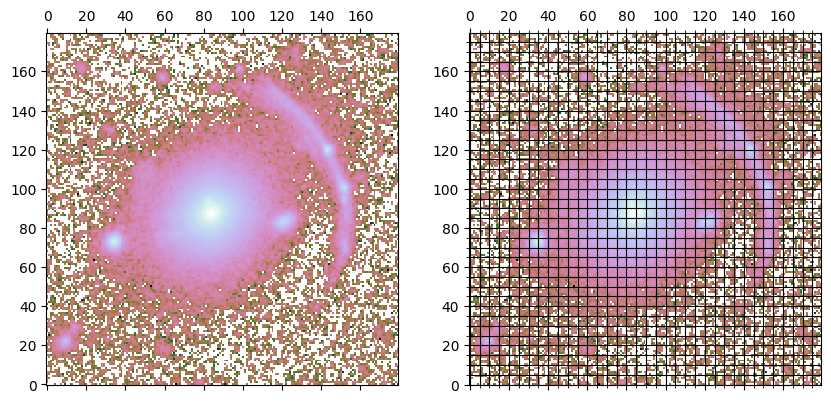

In [ ]:
image_data = kwargs_data["image_data"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.grid(which="both", color="black")
ax2.minorticks_on()
ax2.grid(which="minor", color="black")
plt.show()

[[ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]
 [ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]
 [ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]
 ...
 [ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]
 [ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]
 [ 7.24  7.16  7.08 ... -6.92 -7.   -7.08]]
[[-7.24 -7.24 -7.24 ... -7.24 -7.24 -7.24]
 [-7.16 -7.16 -7.16 ... -7.16 -7.16 -7.16]
 [-7.08 -7.08 -7.08 ... -7.08 -7.08 -7.08]
 ...
 [ 6.92  6.92  6.92 ...  6.92  6.92  6.92]
 [ 7.    7.    7.   ...  7.    7.    7.  ]
 [ 7.08  7.08  7.08 ...  7.08  7.08  7.08]]
180
180.0


/tmp/ipykernel_20/2956826889.py:207: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
/tmp/ipykernel_20/2956826889.py:217: RuntimeWarning: divide by zero encountered in log10
  ax3.matshow(np.log10(image_data*mask), origin="lower", cmap="cubehelix")
/tmp/ipykernel_20/2956826889.py:217: RuntimeWarning: invalid value encountered in log10
  ax3.matshow(np.log10(image_data*mask), origin="lower", cmap="cubehelix")


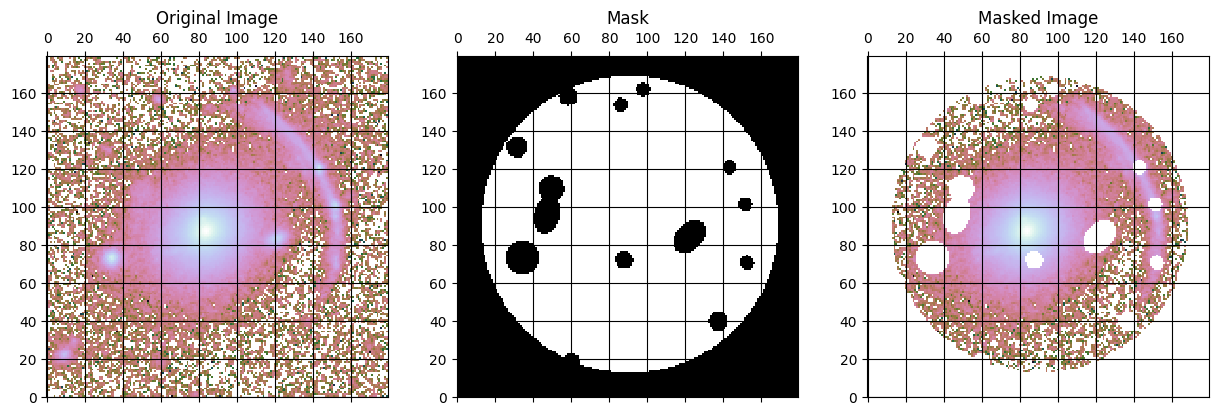

In [ ]:
ra_at_xy_0 = kwargs_data["ra_at_xy_0"]
dec_at_xy_0 = kwargs_data["dec_at_xy_0"]
transform_pix2angle = kwargs_data["transform_pix2angle"]

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data["image_data"])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

print(x_coords)
print(y_coords)
print(num_pix)
r = 6.25  # arcsecond
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(
    lens_center_ra,
    lens_center_dec,
    r,
    util.image2array(x_coords),
    util.image2array(y_coords),
)

# 12'o clock peak
mask_ext_1 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    0.6799999999999935,
    0.28000000000000025,
    0.4,
    0.4,
    0,
)

# 3'o clock blob
mask_ext_2 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -2.5199999999999756,
    -0.5199999999999987,
    0.55,
    0.8,
    (np.pi * 45) / 180,
)

# leftmost (9'o clock) peak
mask_ext_3 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    4.519999999999954,
    -1.3999999999999995,
    0.7,
    0.7,
    0,
)

# 10'o clock faint arc
mask_ext_4 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    3.319999999999966,
    0.7599999999999989,
    0.75,
    1.25,
    (np.pi * 20) / 180,
)

# 8'o clock faint arc
mask_ext_5 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    2.2799999999999763,
    -1.0799999999999983,
    0.25,
    0.25,
    0,
)

# 1'o clock (main arc)
mask_ext_6 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -0.5999999999999943,
    4.999999999999995,
    0.25,
    0.25,
    0,
)

# 11:30
mask_ext_7 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    2.6010256410256414,
    5.394871794871794,
    0.4,
    0.4,
    0,
)

# 10:30
mask_ext_8 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    4.734358974358975,
    3.261538461538462,
    0.45,
    0.45,
    0,
)

# arc, top, right
mask_ext_9 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -0.5579487179487171,
    5.684102564102564,
    0.3,
    0.3,
    0,
)

# arc, top, left
mask_ext_10 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    0.38564102564102654,
    5.0256410256410255,
    0.3,
    0.3,
    0,
)

# 10:00, faint, top
mask_ext_11 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    3.2984615384615386,
    1.4994871794871802,
    0.55,
    0.55,
    0,
)

# 10:00, faint, bottom
mask_ext_12 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    3.503589743589744,
    0.391794871794873,
    0.55,
    0.8,
    (np.pi * 15) / 180,
)

# 7:30
mask_ext_13 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    6.580512820512821,
    -5.435897435897434,
    0.8,
    0.8,
    0,
)

# 6:30
mask_ext_14 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    2.4779487179487183,
    -5.844102564102563,
    0.4,
    0.4,
    0,
)

# 4:00
mask_ext_15 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -3.7169230769230763,
    -4.08,
    0.4,
    0.4,
    0,
)

# peaks on the main arc
mask_ext_16 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -4.207179487179487,
    2.4020512820512825,
    0.3,
    0.3,
    0,
)

mask_ext_17 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -4.863589743589741,
    0.8430769230769238,
    0.3,
    0.3,
    0,
)

mask_ext_18 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -4.904615384615384,
    0.35076923076923094,
    0.3,
    0.3,
    0,
)

mask_ext_19 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    -4.9456410256410255,
    -1.6184615384615382,
    0.3,
    0.3,
    0,
)

mask_ext_20 = mask_util.mask_ellipse(
    util.image2array(x_coords), util.image2array(y_coords), 0.25, -1.5, 0.375, 0.375, 0
)

# central peak

mask_ext_21 = mask_util.mask_ellipse(
    util.image2array(x_coords),
    util.image2array(y_coords),
    0.551794871794873,
    -0.18256410256410163,
    0.375,
    0.375,
    0,
)


mask = (
    (1 - mask_outer)
    * (1 - mask_ext_2)
    * (1 - mask_ext_3)
    * (1 - mask_ext_7)
    * (1 - mask_ext_8)
    * (1 - mask_ext_9)
    * (1 - mask_ext_10)
    * (1 - mask_ext_11)
    * (1 - mask_ext_12)
    * (1 - mask_ext_13)
    * (1 - mask_ext_14)
    * (1 - mask_ext_15)
    * (1 - mask_ext_16)
    * (1 - mask_ext_17)
    * (1 - mask_ext_19)
    * (1 - mask_ext_20)
)

mask[mask >= 1] = 1
mask[mask < 0] = 0
print(np.sqrt(mask_outer.size))

mask = mask.reshape(180, 180)

# plt.matshow(mask, origin='lower', cmap='cubehelix')
# plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax1.grid(which="both", color="black")
ax1.grid(which="minor", color="black")
ax1.title.set_text("Original Image")

ax2.matshow(mask, origin="lower", cmap="gray")
ax2.grid(which="both", color="black")
ax2.grid(which="minor", color="black")
ax2.title.set_text("Mask")

ax3.matshow(np.log10(image_data * mask), origin="lower", cmap="cubehelix")
ax3.grid(which="both", color="black")
ax3.grid(which="minor", color="black")
ax3.title.set_text("Masked Image")

## Initial fitting with the created mask using `Lenstronomy`:

In [ ]:
lens_model_list = ["EPL", "SHEAR", "SIE"]
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE", "SERSIC_ELLIPSE"]

In [ ]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = [
    {
        "theta_E": 2.480576650840685,
        "gamma": 1.6,
        "e1": 0.07754709553817392,
        "e2": 0.0986362110737216,
        "center_x": 0.50821901959265,
        "center_y": -0.3073860343592554,
    },
    {
        "gamma1": -0.06953478171550832,
        "gamma2": 0.057167643610781256,
        "ra_0": 0.0,
        "dec_0": 0.0,
    },
]
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})

fixed_lens.append({"ra_0": 0.0, "dec_0": 0.0})

kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)

kwargs_lens_sigma.append({"gamma1": 0.05, "gamma2": 0.05})

kwargs_lower_lens.append(
    {
        "theta_E": 3.5,
        "gamma": 1.5,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -3,
        "center_y": -3,
    }
)

kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3})

kwargs_upper_lens.append(
    {
        "theta_E": 7.5,
        "gamma": 2.1,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 3,
        "center_y": 3,
    }
)

kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3})

# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = [
    {
        "amp": 1,
        "R_sersic": 0.9315178880133512,
        "n_sersic": 4.0,
        "e1": 0.07754709553817392,
        "e2": -0.0986362110737216,
        "center_x": 0.50821901959265,
        "center_y": -0.3073860343592554,
    }
]
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -3,
        "center_y": -3,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 2,
        "n_sersic": 5.0,
        "center_x": 3,
        "center_y": 3,
        "amp": 100,
    }
)

# source galaxy's light model
fixed_source = []
kwargs_source_init = [
    {
        "amp": 1,
        "R_sersic": 0.027859225534753018,
        "n_sersic": 1.0,
        "e1": 0.26253161342920867,
        "e2": -0.43976588862144245,
        "center_x": 2.2799999999999763,
        "center_y": -1.0799999999999983,
    },
    {
        "amp": 1,
        "n_max": 10,
        "beta": 0.1,
        "center_x": 2.2799999999999763,
        "center_y": -1.0799999999999983,
    },
]
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({"n_sersic": 1.0})

fixed_source.append({"n_max": 10})

kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)

kwargs_source_sigma.append({"beta": 0.1, "center_x": 0.1, "center_y": 0.1})

kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": 2.2799999999999763 - 0.25,
        "center_y": -1.0799999999999983 - 0.25,
        "amp": 0,
    }
)

kwargs_lower_source.append(
    {
        "beta": 0.01,
        "center_x": 2.2799999999999763 - 0.5,
        "center_y": -1.0799999999999983 - 0.5,
    }
)

kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.15,
        "n_sersic": 5.0,
        "center_x": 2.2799999999999763 + 0.25,
        "center_y": -1.0799999999999983 + 0.25,
        "amp": 100,
    }
)

kwargs_upper_source.append(
    {
        "beta": 0.2,
        "center_x": 2.2799999999999763 + 0.5,
        "center_y": -1.0799999999999983 + 0.5,
    }
)

joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]

# joint_lens_with_light = [[0, 0, ["center_x", "center_y", "e1", "e2"]]]

## Add a Satellite with `"SIE"` as the mass profile:

In [ ]:
satellite_center_x = 0.6799999999999935
satellite_center_y = 0.28000000000000025
satellite_centroid_bound = 0.4

fixed_lens.append({})
kwargs_lens_init.append(
    {
        "theta_E": 0.3,
        "e1": 0.3281,
        "e2": 0.1449,
        "center_x": satellite_center_x,
        "center_y": satellite_center_y,
    }
)
kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": satellite_centroid_bound / 4,
        "center_y": satellite_centroid_bound / 4,
    }
)
kwargs_lower_lens.append(
    {
        "theta_E": 0.001,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": satellite_center_x - (satellite_centroid_bound / 2),
        "center_y": satellite_center_y - (satellite_centroid_bound / 2),
    }
)
kwargs_upper_lens.append(
    {
        "theta_E": 2.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": satellite_center_x + (satellite_centroid_bound / 2),
        "center_y": satellite_center_y + (satellite_centroid_bound / 2),
    }
)

## Satellite light profile (`"SERSIC_ELLIPSE"`):

In [ ]:
fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_init.append(
    {
        "amp": 1,
        "R_sersic": 0.5679304381124392,
        "n_sersic": 4.0,
        "e1": -0.36806903272318015,
        "e2": -0.029436308803930614,
        "center_x": satellite_center_x,
        "center_y": satellite_center_y,
    }
)

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": satellite_centroid_bound / 4,
        "center_y": satellite_centroid_bound / 4,
        "amp": 1,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": satellite_center_x - (satellite_centroid_bound / 2),
        "center_y": satellite_center_y - (satellite_centroid_bound / 2),
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 5,
        "n_sersic": 5.0,
        "center_x": satellite_center_x + (satellite_centroid_bound / 2),
        "center_y": satellite_center_y + (satellite_centroid_bound / 2),
        "amp": 100,
    }
)

joint_lens_with_light = [[1, 2, ["center_x", "center_y", "e1", "e2"]]]

In [ ]:
lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]

source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

In [ ]:
# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {
    "joint_lens_with_light": joint_lens_with_light,
    "joint_source_with_source": joint_source_with_source,
    "image_plane_source_list": [True, True],
}

In [ ]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 1, "supersampling_convolution": False}

In [ ]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band"
    # 'multi-linear': every imaging band has independent
    # solutions of the surface brightness,
    # 'joint-linear': there is one joint solution of the linear
    # coefficients demanded across the bands.
}

## Fitting the PSO sequence and saving the resulting joblib file:

In [ ]:
fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
)

fitting_kwargs_list = [
    ["update_settings", {"lens_add_fixed": [[0, ["gamma"]]]}],
    ["PSO", {"sigma_scale": 1.0, "n_particles": 200, "n_iterations": 300}],
    ["update_settings", {"lens_remove_fixed": [[0, ["gamma"]]]}],
]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)

fit_output = chain_list
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = None  # can be not `None` for MCMC

input = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]
output = [kwargs_result, multi_band_list_out, fit_output, kwargs_fixed_out]

output_path = "./DESIJ2318-1106_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

print(kwargs_result)

Computing the PSO ...
10


/opt/conda/lib/python3.10/site-packages/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in double_scalars
  alpha = 2 / (1 + q) * (b / R) ** t * R_omega


20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
Max iteration reached! Stopping.
-1.0071951461239126 reduced X^2 of best position
-8922.23820193868 log likelihood
17717 effective number of data points
[{'theta_E': 4.067223880603599, 'gamma': 1.6, 'e1': 0.07276008841710933, 'e2': 0.08050038205153717, 'center_x': 1.1959247041650833, 'center_y': -0.47859008241387485}, {'gamma1': 0.006431425850186936, 'gamma2': 0.11057625225340582, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.0010046259318139245, 'e1': -0.3310028215726011, 'e2': -0.03475212986012675, 'center_x': 0.6381110047237806, 'center_y': 0.08000119364872199}] lens result
[{'amp': 1, 'R_sersic': 0.10937368735036294, 'n_sersic': 1.0, 'e1': 0.4745572690642822, 'e2': -0.4986601760081292, 'center_x': 0.2380656297920205, 'center_y': -0.05650188417846358}, {'amp': 1, 'n_max': 10, 'beta': 0.19999838052680932, 'center_x': 0.2380656297920205, 'center_y': -0.05650188417846358}] source res

## Visualization of the PSO fit:

-1.0019357848033972 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.001935784803397


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: invalid value encountered in log10
  np.log10(self._model),


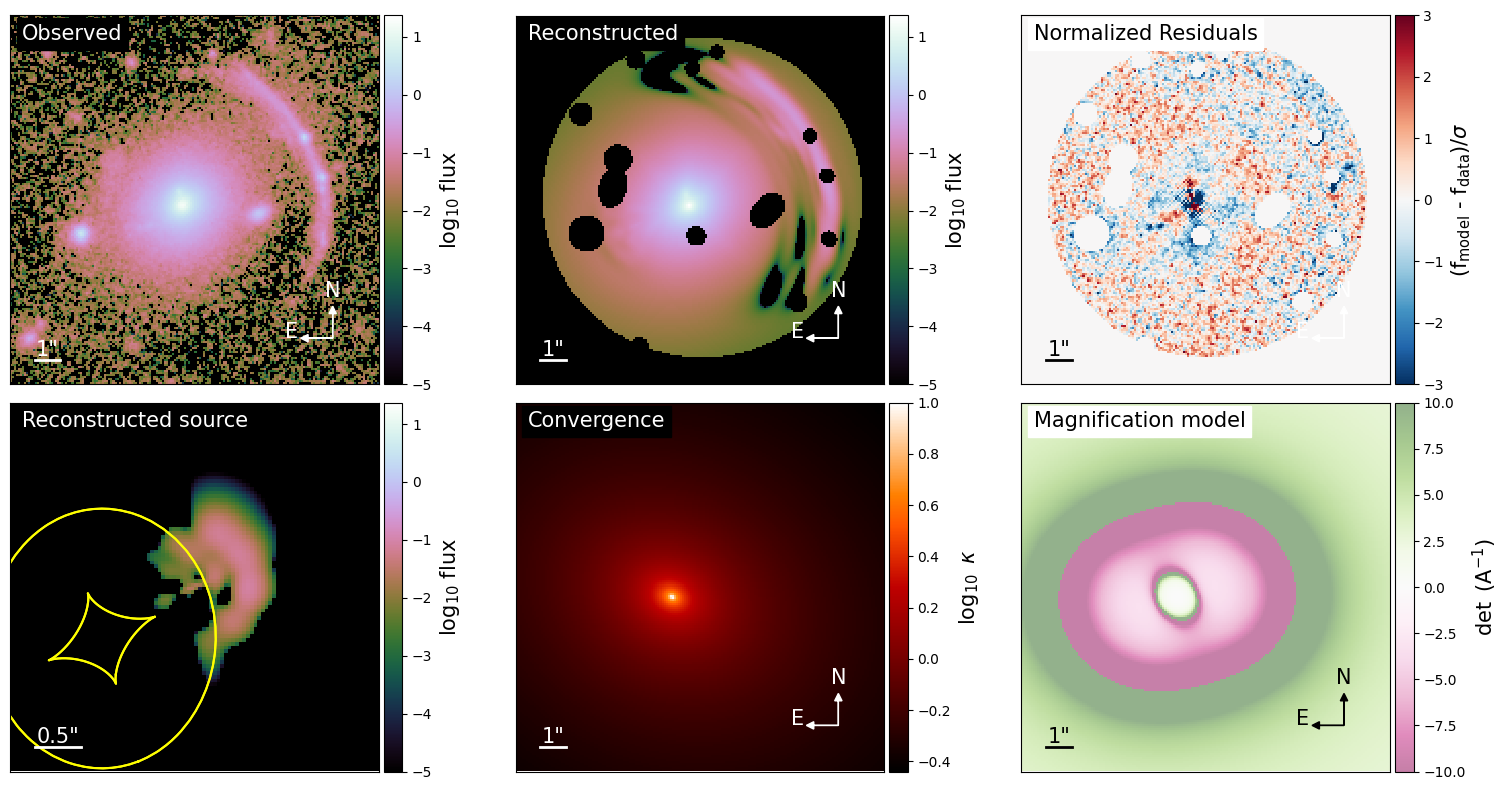

In [ ]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.04, numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:1062: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


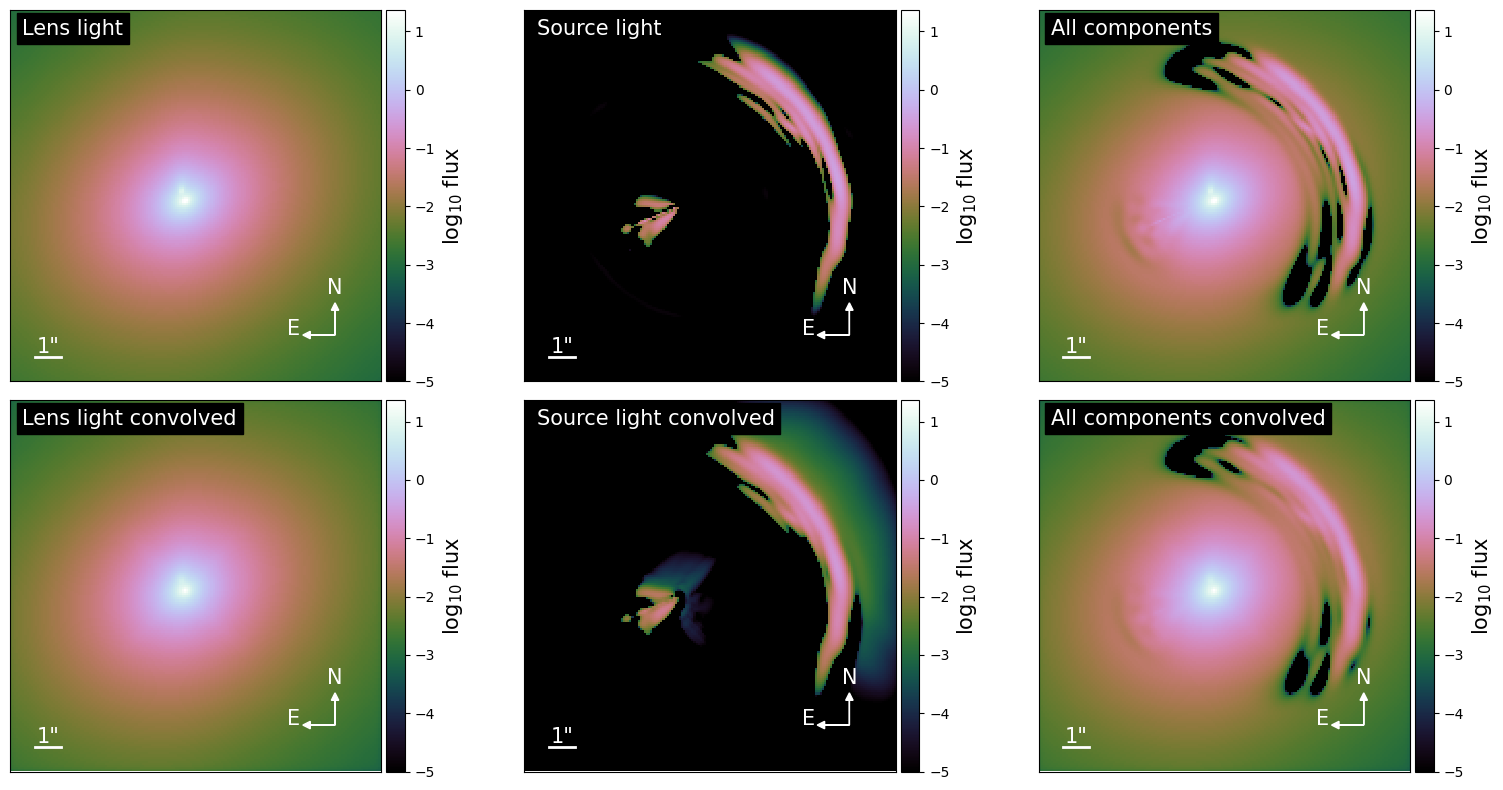

{'kwargs_lens': [{'theta_E': 4.067223880603599, 'gamma': 1.6, 'e1': 0.07276008841710933, 'e2': 0.08050038205153717, 'center_x': 1.1959247041650833, 'center_y': -0.47859008241387485}, {'gamma1': 0.006431425850186936, 'gamma2': 0.11057625225340582, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.0010046259318139245, 'e1': -0.3310028215726011, 'e2': -0.03475212986012675, 'center_x': 0.6381110047237806, 'center_y': 0.08000119364872199}], 'kwargs_source': [{'amp': 4.531426645604976, 'R_sersic': 0.10937368735036294, 'n_sersic': 1.0, 'e1': 0.4745572690642822, 'e2': -0.4986601760081292, 'center_x': 0.2380656297920205, 'center_y': -0.05650188417846358}, {'amp': array([  8.97799847, -17.49789014,  19.8530304 ,  21.83065171,
        -8.18394121,  21.01189183, -31.43505371,  10.15382512,
       -20.81844016,  16.79766084,  31.39722916,  -8.05463233,
        23.03097252,  -7.91873209,  17.30184131, -38.65978954,
         5.14786306, -23.88045822,   9.46433417, -22.47497915,
        13.44359899,  30.68021

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result)